In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

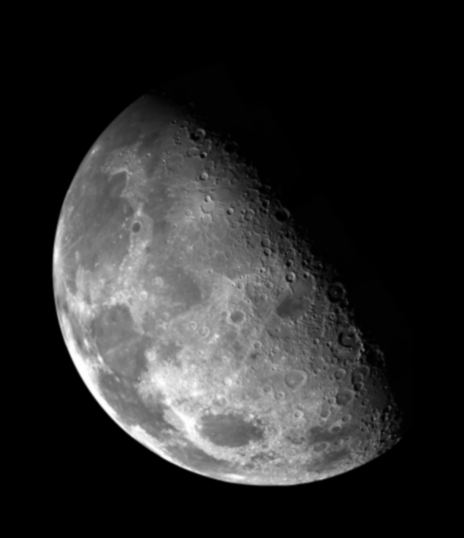

In [ ]:
img = cv2.imread('temp.jpg', 0)
rows, cols = img.shape
crow, ccol = rows//2, cols//2
cv2_imshow(img);

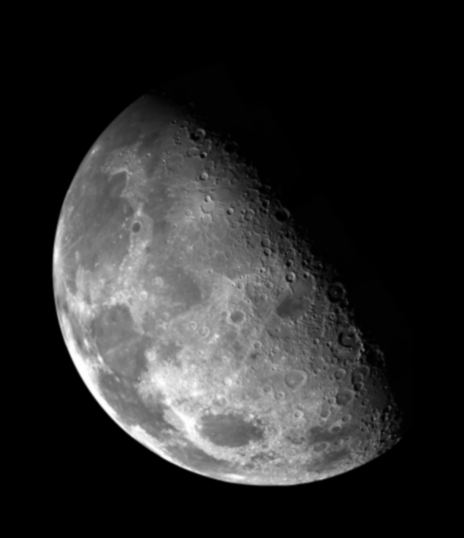

In [ ]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
cv2_imshow(img);

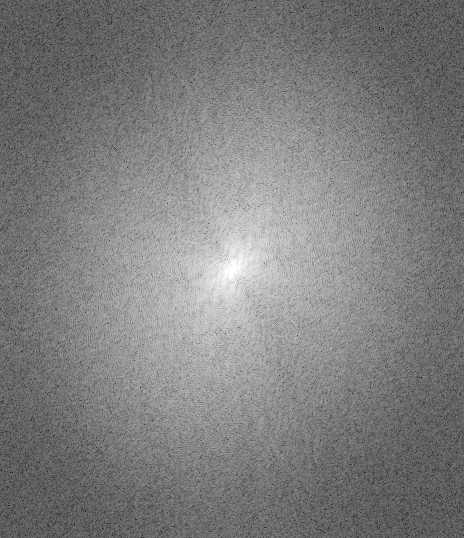

In [ ]:
magnitude_spectrum = 20*np.log(np.abs(fshift)+1)
cv2_imshow(magnitude_spectrum);

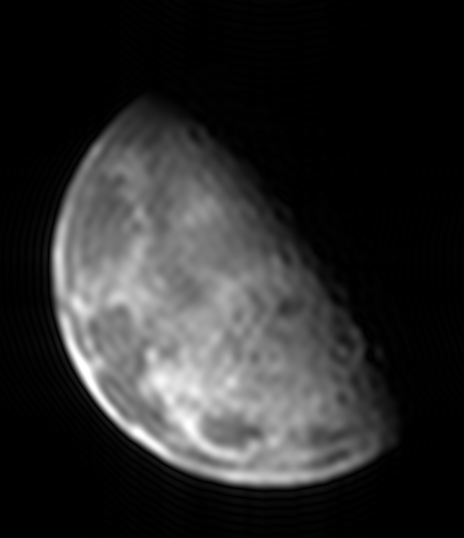

In [ ]:
r_lpf = 30
mask_lpf = np.zeros((rows, cols), np.uint8)
mask_lpf[crow-r_lpf:crow+r_lpf, ccol-r_lpf:ccol+r_lpf] = 1
fshift_lpf = fshift * mask_lpf
img_lpf = np.fft.ifft2(np.fft.ifftshift(fshift_lpf))
img_lpf = np.abs(img_lpf)
cv2_imshow(img_lpf);

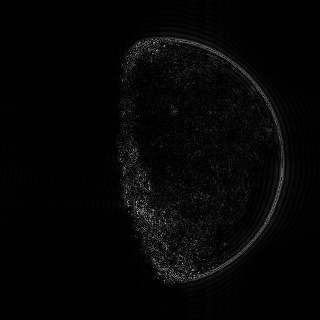

In [ ]:
mask_hpf = 1 - mask_lpf
fshift_hpf = fshift * mask_hpf
img_hpf = np.fft.ifft2(np.fft.ifftshift(fshift_hpf))
img_hpf = np.abs(img_hpf)
cv2_imshow(img_hpf);

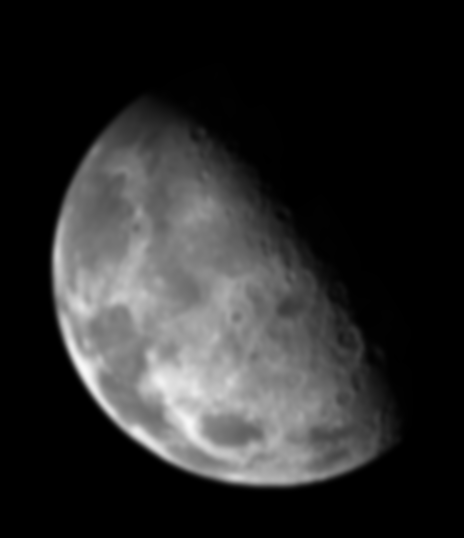

In [ ]:
D0 = 30
gaussian_lpf = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        gaussian_lpf[i, j] = np.exp(-(dist**2) / (2 * (D0**2)))

fshift_glpf = fshift * gaussian_lpf
img_glpf = np.fft.ifft2(np.fft.ifftshift(fshift_glpf))
img_glpf = np.abs(img_glpf)

cv2_imshow(img_glpf)

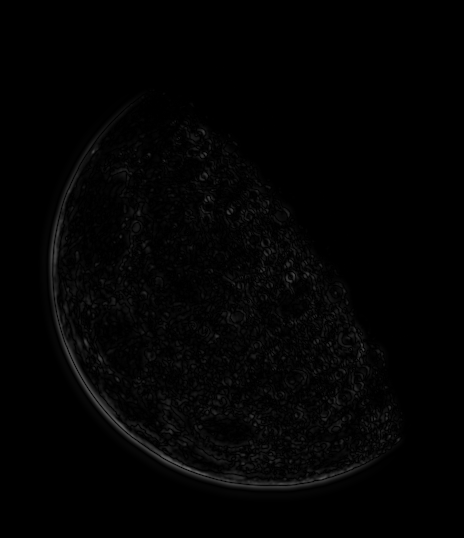

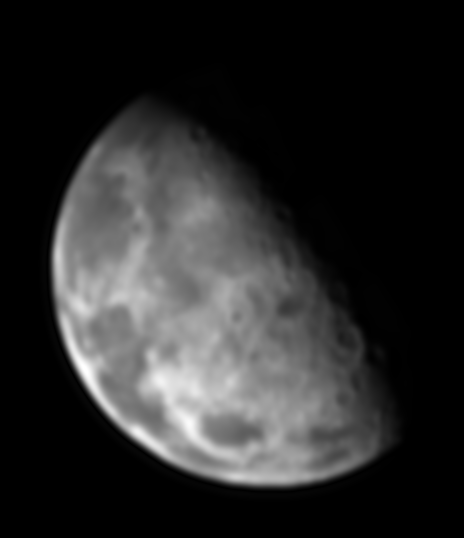

In [ ]:
D0 = 30
n = 2
butter_lpf = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        butter_lpf[i, j] = 1 / (1 + (dist / D0)**(2 * n))
fshift_blpf = fshift * butter_lpf
img_blpf = np.fft.ifft2(np.fft.ifftshift(fshift_blpf))
img_blpf = np.abs(img_blpf)

butter_hpf = 1 - butter_lpf
fshift_bhpf = fshift * butter_hpf
img_bhpf = np.fft.ifft2(np.fft.ifftshift(fshift_bhpf))
img_bhpf = np.abs(img_bhpf)

cv2_imshow(img_bhpf)
cv2_imshow(img_blpf)